# Postprocessing variables from visdump hdf5 file.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [3]:
import numpy as np

import sys
sys.path.append("/Users/shua784/github/modvis")
import modvis.ATSutils as utils 
import modvis.ats_xdmf as xdmf
import modvis.transect_data as transect_data
import modvis.plot_vis_file as pv
import modvis.general_plots as gp
import modvis.utils as ut 
import modvis.colors as mcolors
import modvis.objectivefunctions as ofs

In [4]:
model_dir = "../data/coalcreek/"

prefix = "ats_vis"
subsurface_mesh = f"{prefix}_mesh.h5"
surface_mesh = f"{prefix}_surface_mesh.h5"
subsurface_h5 = f"{prefix}_data.h5"
surface_h5 = f"{prefix}_surface_data.h5"

fname_subsurface_h5 = model_dir + subsurface_h5
fname_surface_h5 = model_dir + surface_h5
fname_surface_mesh = model_dir + surface_mesh
fname_mesh = model_dir + subsurface_mesh

# import vis data

In [5]:
visfile = xdmf.VisFile(model_dir, filename=subsurface_h5, 
                       mesh_filename=subsurface_mesh, load_mesh=True, columnar=True,
                      )

# plot subsurface satuation

## single column

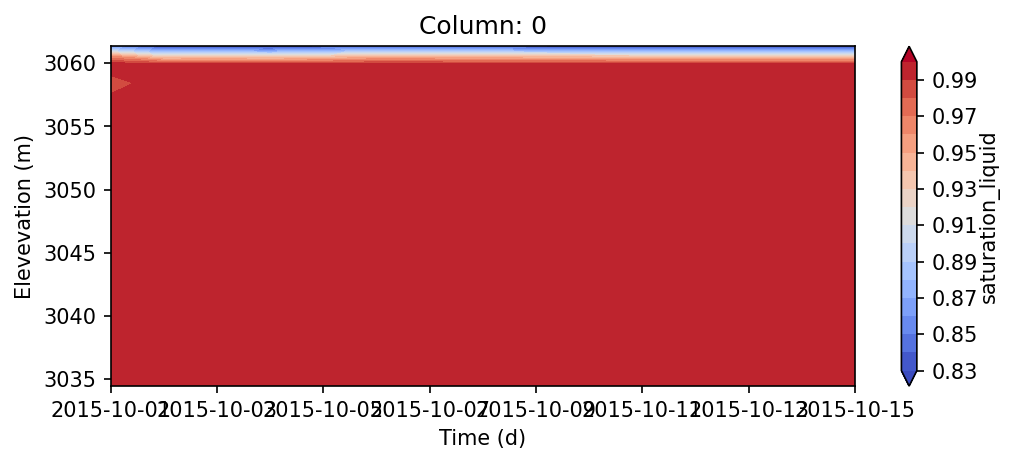

In [6]:
fig, ax = pv.plot_column_data(visfile, var_name = "saturation_liquid", cmap = "coolwarm", 
                              col_ind=0)

## single layer

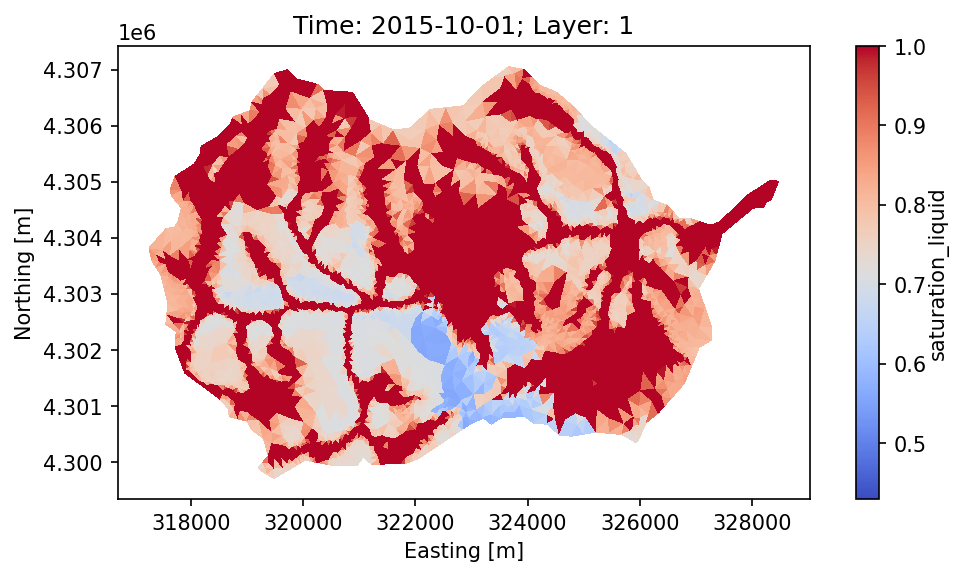

In [7]:
fig, ax = pv.plot_layer_data(visfile, var_name = "saturation_liquid", 
                             layer_ind = 0, time_slice= "2015-10-01",
                          cmap = "coolwarm")

# plot groundwater table

## single column

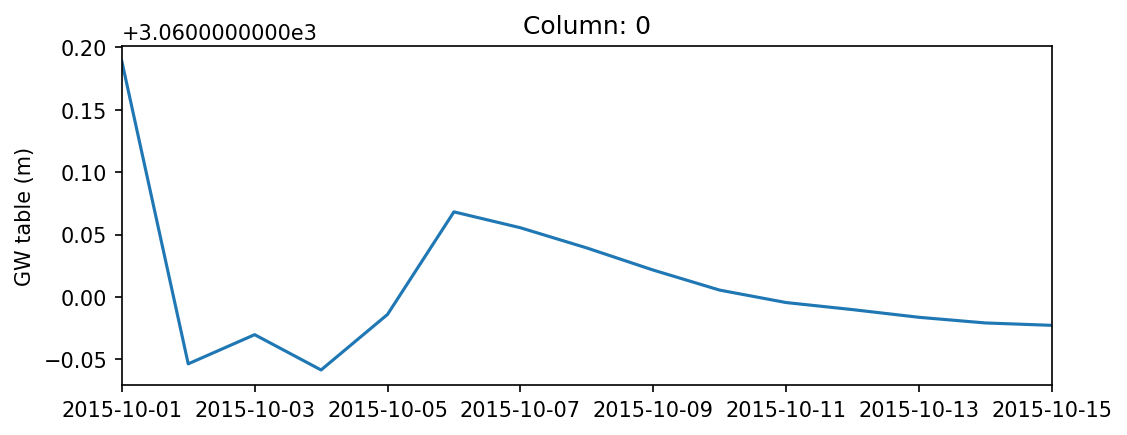

In [8]:
ihead = pv.plot_column_head(visfile, col_ind = 0)

## GW surface

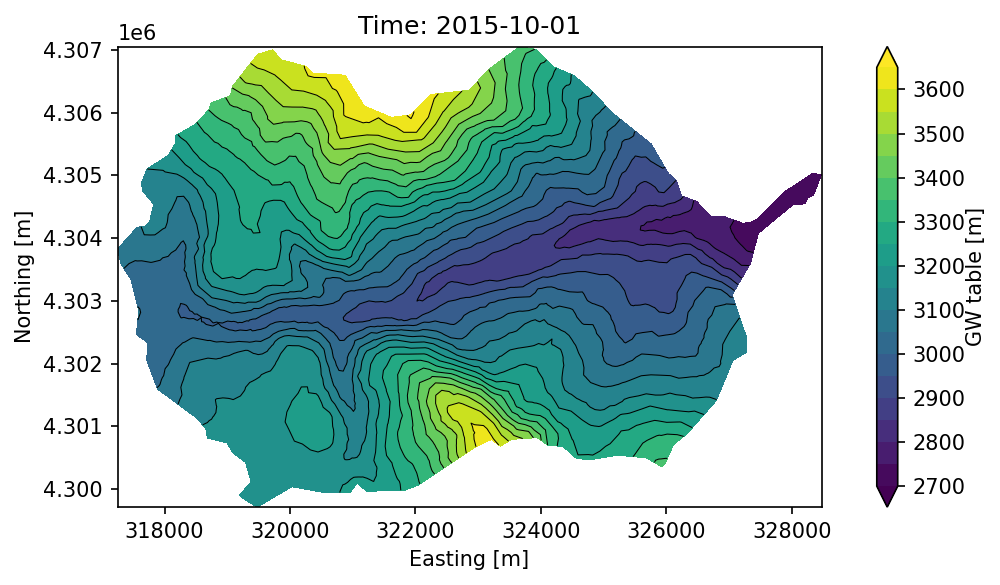

In [9]:
fig, ax, tpc = pv.plot_gw_surface(visfile, time_slice = 0, contour = True, 
                                  contourline = True, nlevel = np.arange(2700,3665, 50), 
                                  colorbar = True,
                                 )

# Volumetric water content

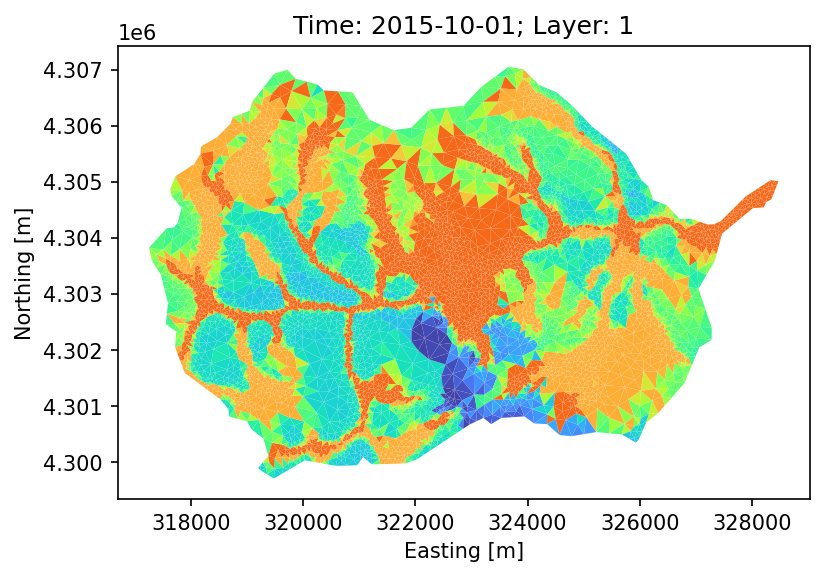

In [10]:
fig, ax, tpc = pv.plot_water_content(visfile, layer_ind = 0, 
                                     vmin = 0.1, vmax = 0.22, cmap = 'turbo',
                                     time_slice=0)